In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn-paper')
plt.rc('font',family='Times New Roman')
import seaborn as sns
import pandas as pd
sns.set_theme(style="ticks")
import joblib
import numpy as np

# 条形图绘图——分布差异

In [2]:
data=pd.read_excel("Problem_C_Data_Wordle.xlsx")
data=data.sort_values(by="Date")
data=data.reset_index().drop(columns="index")
data

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 Try,2 Tries,3 Tries,4 Tries,5 Tries,6 Tries,Above 6 Tries
0,2022-01-07,202,slump,80630,1362,0.01,0.03,0.23,0.39,0.24,0.09,0.01
1,2022-01-08,203,crank,101503,1763,0.01,0.05,0.23,0.31,0.24,0.14,0.02
2,2022-01-09,204,gorge,91477,1913,0.01,0.03,0.13,0.27,0.30,0.22,0.04
3,2022-01-10,205,query,107134,2242,0.01,0.04,0.16,0.30,0.30,0.17,0.02
4,2022-01-11,206,drink,153880,3017,0.01,0.09,0.35,0.34,0.16,0.05,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-12-27,556,condo,20879,2012,0.00,0.02,0.17,0.35,0.29,0.14,0.03
355,2022-12-28,557,impel,20160,1937,0.00,0.03,0.21,0.40,0.25,0.09,0.01
356,2022-12-29,558,havoc,20001,1919,0.00,0.02,0.16,0.38,0.30,0.12,0.02
357,2022-12-30,559,molar,21204,1973,0.00,0.04,0.21,0.38,0.26,0.09,0.01


In [28]:
results=joblib.load("resultall.pkl")

In [87]:
score_distribution=[]
for i in results:
    valuev=np.array(i['score_distribution'])
    valuev=valuev/np.sum(valuev)
    score_distribution.append(valuev)
score_distribution

[array([0.        , 0.19498607, 0.74094708, 0.06406685]),
 array([0.        , 0.20891365, 0.72144847, 0.06963788]),
 array([0.        , 0.21448468, 0.73816156, 0.04735376]),
 array([0.        , 0.20891365, 0.72980501, 0.06128134]),
 array([0.00278552, 0.2005571 , 0.75208914, 0.04456825]),
 array([0.        , 0.19220056, 0.74373259, 0.06406685])]

In [88]:
dataplot=data.loc[:,"1 Try":"6 Tries"]
dataplot=dataplot.T.reset_index()
dataplot=pd.melt(dataplot,id_vars=['index'])

In [89]:
modelplot=pd.DataFrame(columns=[0,1,2,3,4,5])
for i in score_distribution:
    modelplot=modelplot.append(pd.DataFrame(i).T,ignore_index=True)
modelplot=modelplot.fillna(0)
modelplot.columns=data.loc[:,"1 Try":"6 Tries"].columns
modelplot=pd.melt(modelplot.T.reset_index(),id_vars=['index'])

C:\Users\aa271\AppData\Local\Temp\ipykernel_26212\2474196159.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modelplot=modelplot.append(pd.DataFrame(i).T,ignore_index=True)


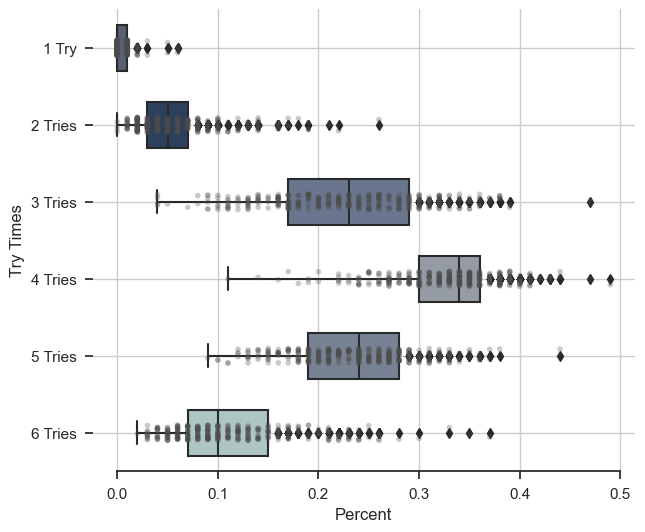

In [83]:
# 主数据集
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="value", y="index", data=dataplot,
            whis=[0, 1], width=.6, palette=["#546076","#253F63","#637493","#929BA7","#728298","#A9C9C6"])

# Add in points to show each observation
sns.stripplot(x="value", y="index", data=dataplot,
              size=4, color=".3", linewidth=0,alpha=0.3)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.set(ylabel="Try Times")
ax.set(xlabel="Percent")
sns.despine(trim=True, left=True)
plt.savefig("Real Try.svg")
plt.savefig("Real Try.png")

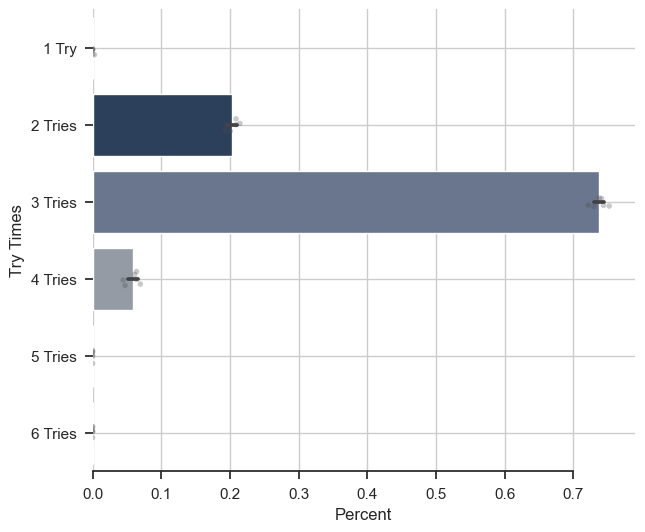

In [92]:

# 非主数据集
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.barplot(x="value", y="index", data=modelplot, palette=["#546076","#253F63","#637493","#929BA7","#728298","#A9C9C6"])

# Add in points to show each observation
sns.stripplot(x="value", y="index", data=modelplot,
              size=4, color=".3", linewidth=0,alpha=0.3)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.set(ylabel="Try Times")
ax.set(xlabel="Percent")
sns.despine(trim=True, left=True)
plt.savefig("Rule Try.svg")
plt.savefig("Rule Try.png")

# 时间序列的描述性统计

D:\ANA\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


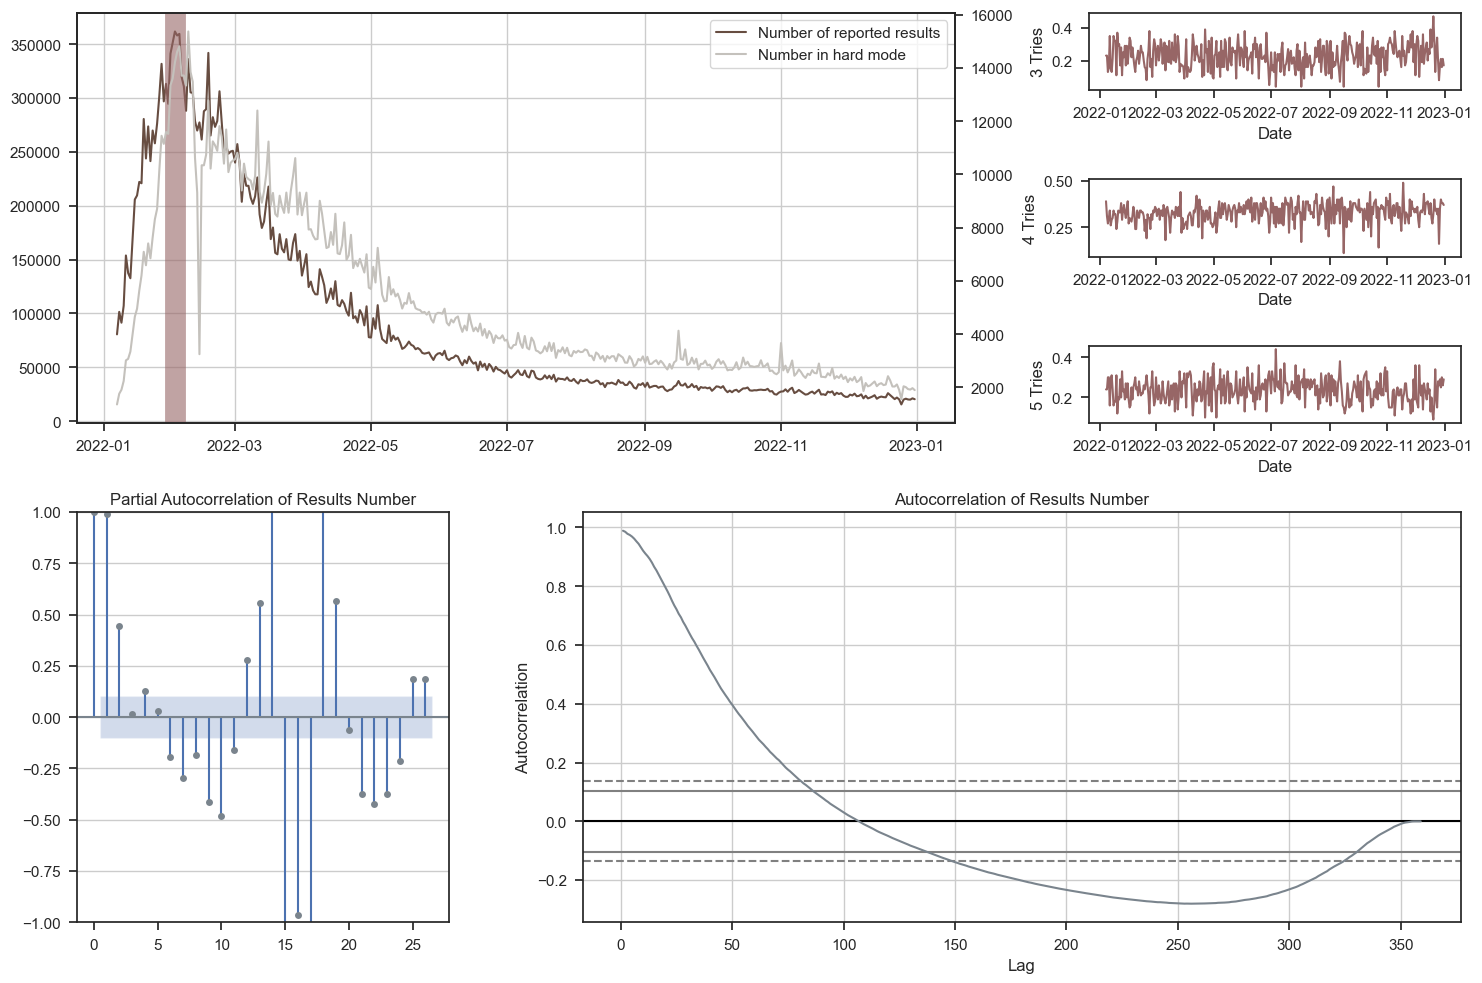

In [182]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((6, 3), (0, 0), rowspan=3,colspan=2)
ax1t=ax1.twinx()
# sns.lineplot(x="Date", y="Number of reported results",data=data,ax=ax1,color="#674D41",label="Number of reported results")
# sns.lineplot(x="Date", y="Number in hard mode",data=data,ax=ax1t,color="#C4C1BC",label="Number in hard mode")
p1,=ax1.plot(data["Date"],data["Number of reported results"],color="#674D41",label="Number of reported results")
p2,=ax1t.plot(data["Date"],data["Number in hard mode"],color="#C4C1BC",label="Number in hard mode")
ax1.legend(handles=[p1, p2])

ax1.axvline(x=data["Date"][np.argmax(data["Number of reported results"])],linewidth=15,alpha=0.6,color="#976666")
ax1.xaxis.grid(True)
ax1.yaxis.grid(True)

ax4 = plt.subplot2grid((6, 3), (0, 2), rowspan=1,colspan=1)
sns.lineplot(x="Date", y="3 Tries",data=data,ax=ax4,color="#976666")
ax5 = plt.subplot2grid((6, 3), (1, 2), rowspan=1,colspan=1)
sns.lineplot(x="Date", y="4 Tries",data=data,ax=ax5,color="#976666")
ax6 = plt.subplot2grid((6, 3), (2, 2), rowspan=1,colspan=1)
sns.lineplot(x="Date", y="5 Tries",data=data,ax=ax6,color="#976666")

ax3 = plt.subplot2grid((6, 3), (3, 0), rowspan=3,colspan=1)
plot_pacf(data["Number of reported results"],ax=ax3,color="#7A848D")
ax3.set_title("Partial Autocorrelation of Results Number")
ax3.yaxis.grid(True)

ax2 = plt.subplot2grid((6, 3), (3, 1), rowspan=3,colspan=2)
autocorrelation_plot(data["Number of reported results"],ax=ax2,color="#7A848D")
ax2.set_title("Autocorrelation of Results Number")

plt.tight_layout()
plt.savefig("TS.svg")
plt.show()

In [3]:
datainfer=pd.read_csv("datainfer.csv")
datain=pd.read_csv("datainner.csv")
dataou=pd.read_csv("dataouter.csv")
datainfer=pd.read_csv("datainfer.csv")
dataclsuter=pd.read_csv("datacluster.csv")

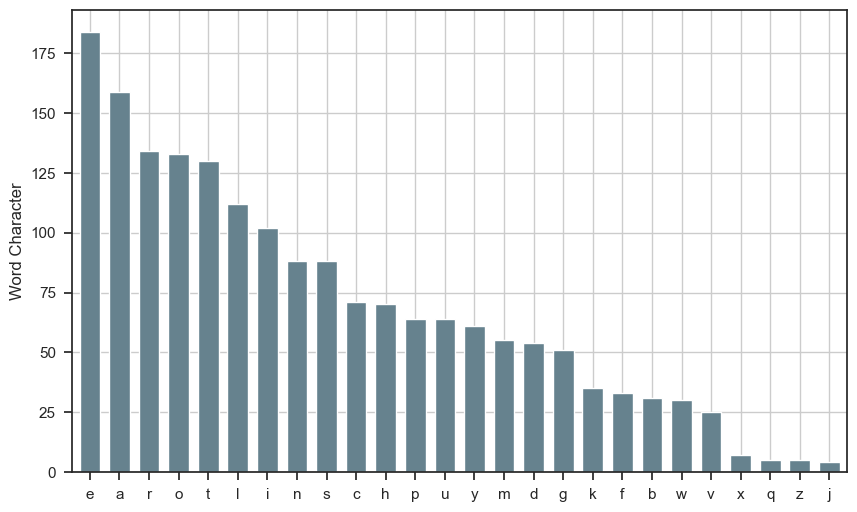

In [33]:
## 准备数据,宽数据变换为长数据
dfwordlong = datain.melt(value_vars = ["word1","word2","word3","word4","word5"],
                 var_name="wordvar",value_name="word")
## 每个单词出现的频次
dfwordlong.word.value_counts().plot(kind = "bar",figsize = (10,6),width = 0.7,color="#66828E")
plt.ylabel("Word Character")
plt.xticks(rotation = 0)
plt.grid()
plt.savefig("Word Character.svg")
plt.show()

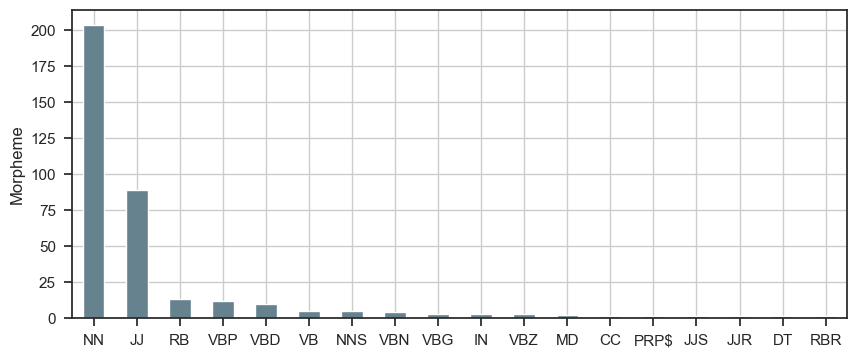

In [34]:
## 准备数据,宽数据变换为长数据
dfwordlong = dataou.melt(value_vars = ["WordCharacter"],
                 var_name="wordvar",value_name="word")
## 每个单词出现的频次
dfwordlong.word.value_counts().plot(kind = "bar",figsize = (10,4),color="#66828E")
plt.ylabel("Morpheme")
plt.xticks(rotation = 0)
plt.grid()
plt.savefig("Morpheme.svg")
plt.show()

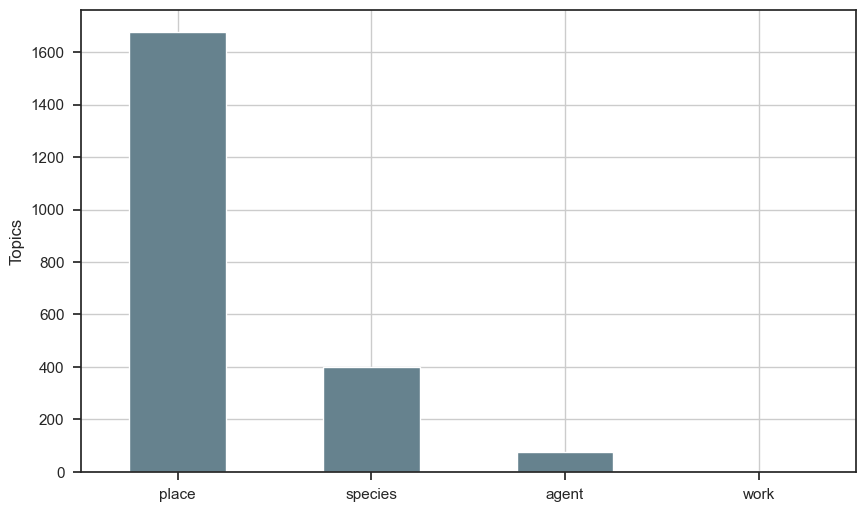

In [35]:
## 准备数据,宽数据变换为长数据
dfwordlong = dataou.melt(value_vars = ['salet Topics',
       'reast Topics', 'crate Topics', 'trace Topics', 'slate Topics',
       'crane Topics'],
                 var_name="wordvar",value_name="word")
## 每个单词出现的频次
dfwordlong.word.value_counts().plot(kind = "bar",figsize = (10,6),color="#66828E")
plt.ylabel("Topics")
plt.xticks(rotation = 0)
plt.grid()
plt.savefig("Topics.svg")
plt.show()

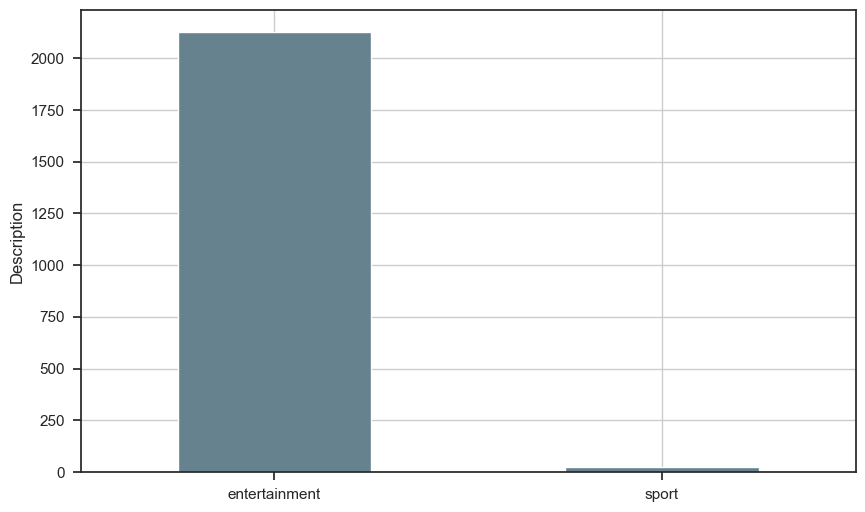

In [4]:
## 准备数据,宽数据变换为长数据
dfwordlong = dataou.melt(value_vars = ['salet Description', 'reast Description',
       'crate Description', 'trace Description', 'slate Description',
       'crane Description'],
                 var_name="wordvar",value_name="word")
## 每个单词出现的频次
dfwordlong.word.value_counts().plot(kind = "bar",figsize = (10,6),color="#66828E")
plt.ylabel("Description")
plt.xticks(rotation = 0)
plt.grid()
plt.savefig("Description.svg")
plt.show()

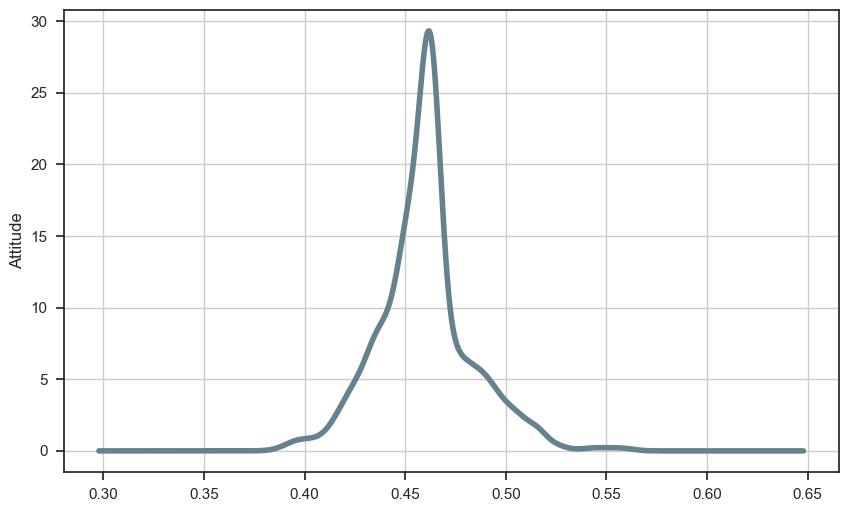

In [37]:
## 准备数据,宽数据变换为长数据
dfwordlong = dataou.melt(value_vars = ['salet Attitude', 'reast Attitude',
       'crate Attitude', 'trace Attitude', 'slate Attitude', 'crane Attitude'],
                 var_name="wordvar",value_name="word")
## 每个单词出现的频次
dfwordlong.word.plot(kind = "kde",figsize = (10,6),color="#66828E",linewidth=4)
plt.ylabel("Attitude")
plt.xticks(rotation = 0)
plt.grid()
plt.savefig("Attitude.svg")
plt.show()

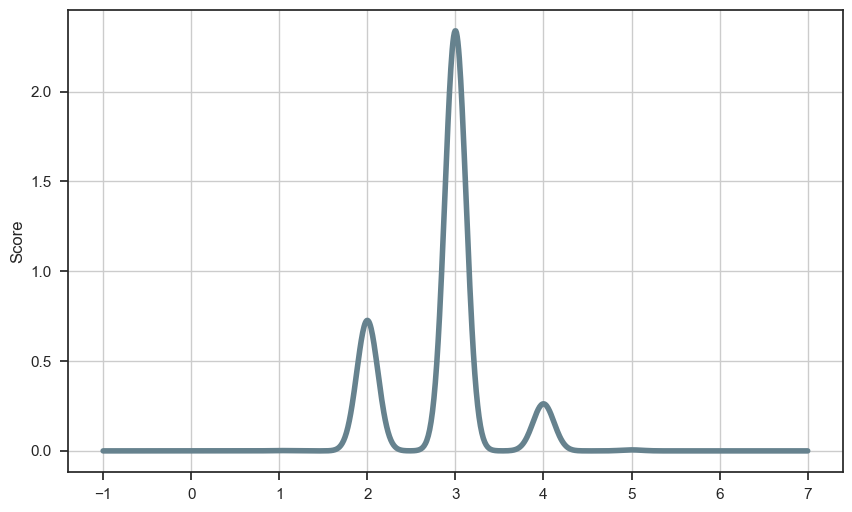

In [6]:
## 准备数据,宽数据变换为长数据
dfwordlong = datain.melt(value_vars = ['crate score', 'trace score', 'slate score', 'crane score','salet score' ],
                 var_name="wordvar",value_name="word")
## 每个单词出现的频次
dfwordlong.word.plot(kind = "kde",figsize = (10,6),color="#66828E",linewidth=4)
plt.ylabel("Score")
plt.xticks(rotation = 0)
plt.grid()
plt.savefig("Score.svg")
plt.show()

In [7]:
datain_pre = pd.read_csv("datainner_pre.csv")
dataou_pre = pd.read_csv("dataouter_pre.csv")
datafa_pre = pd.read_excel("Problem_C_Data_Wordle_predict.xlsx")
datafa_pre = datafa_pre.sort_values(by="Date")
datafa_pre = datafa_pre.reset_index().drop(columns="index")

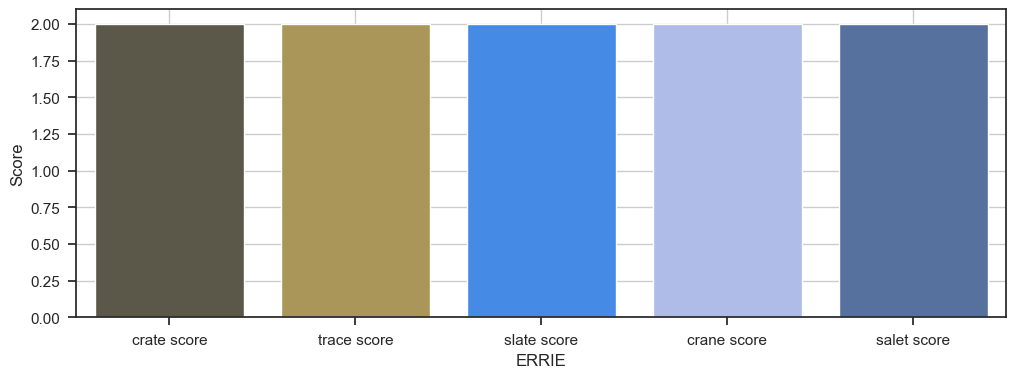

In [16]:
plt.figure(figsize=(12,4))
df4=datain_pre[['crate score', 'trace score', 'slate score', 'crane score','salet score' ]].copy()
df4 = df4.melt(value_vars = ['crate score', 'trace score', 'slate score', 'crane score','salet score' ],
                 var_name="ERRIE",value_name="Score")
sns.barplot(data=df4,x="ERRIE", y="Score",palette = ["#5E5946","#B69D4B","#2A86FF","#A4B7F0","#4B6DAB"])
plt.grid()
# plt.savefig(i+"七日预测.svg")
plt.show()